![Alt Microsoft Logo](https://github.com/earlcr/Microsoft-Movie-Analysis/blob/template-mvp/images/microsoft%20logo.jpg)

# Microsoft Movie Production Data Analysis

**Author:** Earl Chirchir
***

## Overview

Microsoft is launching a new movie studio and requires data-driven insights to inform its investment strategy. This analysis focuses on identifying patterns in historical movie data to uncover the genres, franchises, ratings, and other factors that correlate with box office success. The goal is to provide Microsoft with actionable recommendations to maximize the financial returns of its upcoming slate of films.

Descriptive statistics and data visualizations are used to analyze three key datasets from IMDb and The Numbers containing movie metadata, user ratings, and box office gross revenue data. The findings indicate that movies with the Adventure, Action, and Sci-Fi genre combination consistently rank highly on revenue metrics. Developing franchises and leveraging positive user ratings also emerge as success factors.



## Business Problem

As Microsoft launches its new movie studio, the company needs to leverage data analytics to inform its multimillion dollar investment decisions on film projects. Microsoft seeks to optimize its genre selection strategy to choose movie ideas with the highest revenue potential based on historical box office data.

The key questions this analysis aims to answer are:

-  Based on past movies, which genres have consistently generated the highest domestic and international box office gross revenues?
-  How do user ratings and number of votes on sites like IMDb correlate to overall financial performance for different movie genres?
-  Can Microsoft use these genre insights to select projects with the highest probability of box office success for its upcoming slate of original films?

By uncovering key patterns linking movie genres to box office results, Microsoft can develop a data-driven investment thesis for its new studio. This will help guide genre selection to maximize financial returns.

## Data Understanding

The analysis uses three datasets:

i) **bom.movie_gross.csv** - Contains box office revenue data for over 7,000 movies. Key variables are 'title', 'studio', 'domestic_gross', and 'foreign_gross'.  
ii) **title.basics.csv** - Provides movie metadata like 'original_title', 'runtime_minutes', and 'genres' for over half a million titles.  
iii) **title.ratings.csv** - Includes audience ratings data with variables like 'averagerating' and 'numvotes'.

The target variable is the total box office gross revenue, calculated by summing 'domestic_gross' and 'foreign_gross'.

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load in the dataframes

In [2]:
gross_revenues_df = pd.read_csv('zippedData/bom.movie_gross.csv')
movies_basic_info_df = pd.read_csv('zippedData/title.basics.csv')
movies_ratings_df = pd.read_csv('zippedData/title.ratings.csv')

### Explore info and top rows of each dataframe

In [3]:
gross_revenues_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
gross_revenues_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movies_basic_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
movies_basic_info_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
movies_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Data Preparation

The steps taken to prepare the data include:

i)  Dropped rows with missing 'studio' values in gross revenue data.  
ii)  Imputed missing numeric values with median.  
iii)  Ensured data types were appropriate for analysis.  
iv)  Merged the 3 datasets using 'title' and 'tconst' as keys.  
v)  Created a 'total_gross' column by summing 'domestic_gross' and 'foreign_gross'.  
vi)  Added a column to identify franchise movies.

These choices ensured complete cases for analysis, maintained data integrity, and enabled insights across multiple datasets.

### Examine missing values in each dataframe

In [9]:
gross_revenues_df_missing_values_count = gross_revenues_df.isna().sum()
print(gross_revenues_df_missing_values_count)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


### Calculate percentage and count of missing values for each column

In [10]:
studio_column_missing_percentage = gross_revenues_df['studio'].isna().mean()*100
domestic_gross_column_missing_percentage = gross_revenues_df['domestic_gross'].isna().mean()*100
foreign_gross_column_missing_percentage = gross_revenues_df['foreign_gross'].isna().mean()*100

studio_column_unique_values_count = gross_revenues_df['studio'].nunique()
domestic_gross_column_unique_values_count = gross_revenues_df['domestic_gross'].nunique()
foreign_gross_column_unique_values_count = gross_revenues_df['foreign_gross'].nunique()

print(f'Percentage of missing values in studio column: {studio_column_missing_percentage:.2f}%')
print(f'Number of unique values in studio colum: {studio_column_unique_values_count}')

print(f'Percentage of missing values in domestic_gross column: {domestic_gross_column_missing_percentage:.2f}%')
print(f'Number of unique values in studio colum: {domestic_gross_column_unique_values_count}')

print(f'Percentage of missing values in foreign_gross column: {foreign_gross_column_missing_percentage:.2f}%')
print(f'Number of unique values in studio colum: {foreign_gross_column_unique_values_count}')

Percentage of missing values in studio column: 0.15%
Number of unique values in studio colum: 257
Percentage of missing values in domestic_gross column: 0.83%
Number of unique values in studio colum: 1797
Percentage of missing values in foreign_gross column: 39.86%
Number of unique values in studio colum: 1204


### Repeat missing value examination for other dataframes

In [11]:
movies_basic_info_df_missing_values_count = movies_basic_info_df.isna().sum()
print(movies_basic_info_df_missing_values_count)

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [12]:
original_title_column_missing_percentage = movies_basic_info_df['original_title'].isna().mean()*100
runtime_minutes_column_missing_percentage = movies_basic_info_df['runtime_minutes'].isna().mean()*100
genres_column_missing_percentage = movies_basic_info_df['genres'].isna().mean()*100

original_title_column_unique_values_count = movies_basic_info_df['original_title'].nunique()
runtime_minutes_column_unique_values_count = movies_basic_info_df['runtime_minutes'].nunique()
genres_column_title_unique_values_count = movies_basic_info_df['genres'].nunique()

print(f'Percentage of missing values in original_title column: {original_title_column_missing_percentage:.2f}%')
print(f'Number of unique values in original_title column: {original_title_column_unique_values_count}')

print(f'Percentage of missing values in runtime_minutes column: {runtime_minutes_column_missing_percentage:.2f}%')
print(f'Number of unique values in runtime_minutes column: {runtime_minutes_column_unique_values_count}')

print(f'Percentage of missing values in genres column: {genres_column_missing_percentage:.2f}%')
print(f'Number of unique values in genres column: {genres_column_title_unique_values_count}')

Percentage of missing values in original_title column: 0.01%
Number of unique values in original_title column: 137773
Percentage of missing values in runtime_minutes column: 21.72%
Number of unique values in runtime_minutes column: 367
Percentage of missing values in genres column: 3.70%
Number of unique values in genres column: 1085


In [13]:
movies_ratings_df_missing_values = movies_ratings_df.isna().sum()
print(movies_ratings_df_missing_values)

tconst           0
averagerating    0
numvotes         0
dtype: int64


# Data Cleaning

### Cleaning steps for gross revenue dataframe

In [14]:
# For gross_revenues_df
# Drop rows with missing 'studio'
gross_revenues_df.dropna(subset=['studio'], inplace=True)

In [15]:
# Impute 'domestic_gross' with the median
median_domestic_gross = gross_revenues_df['domestic_gross'].median()
gross_revenues_df['domestic_gross'].fillna(median_domestic_gross, inplace=True)
print(median_domestic_gross)

1400000.0


In [16]:
cleaned_domestic_gross = gross_revenues_df['domestic_gross']
print(cleaned_domestic_gross)

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3382, dtype: float64


In [17]:
# Ensure the 'foreign_gross' column is of type string
gross_revenues_df['foreign_gross'] = gross_revenues_df['foreign_gross'].astype(str)

# Remove commas and convert 'foreign_gross' to numeric
gross_revenues_df['foreign_gross'] = gross_revenues_df['foreign_gross'].str.replace(',', '').astype(float)

# Impute 'foreign_gross' with the median
median_foreign_gross = gross_revenues_df['foreign_gross'].median()
gross_revenues_df['foreign_gross'].fillna(median_foreign_gross, inplace=True)

print(median_foreign_gross)


18700000.0


In [18]:
cleaned_foreign_gross = gross_revenues_df['foreign_gross']
print(cleaned_foreign_gross)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382     18700000.0
3383     18700000.0
3384     18700000.0
3385     18700000.0
3386     18700000.0
Name: foreign_gross, Length: 3382, dtype: float64


In [19]:
# For gross_revenues_df
gross_revenues_df_missing_values_count = gross_revenues_df.isna().sum()
print("Missing values in gross_revenues_df:")
print(gross_revenues_df_missing_values_count)

Missing values in gross_revenues_df:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


### Cleaning steps for basics dataframe


In [20]:
# Drop rows with missing 'original_title' since the percentage is extremely low
movies_basic_info_df.dropna(subset=['original_title'], inplace=True)

In [21]:
# Impute 'runtime_minutes' with the median
median_runtime_minutes = movies_basic_info_df['runtime_minutes'].median()
movies_basic_info_df['runtime_minutes'].fillna(median_runtime_minutes, inplace=True)
print(median_runtime_minutes)

87.0


In [22]:
# Impute 'genres' with the mode value
mode_genres = movies_basic_info_df['genres'].mode().iloc[0]
movies_basic_info_df['genres'].fillna(mode_genres, inplace=True)

In [23]:
# For movies_basic_info_df
movies_basic_info_df_missing_values_count = movies_basic_info_df.isna().sum()
print("Missing values in movies_basic_info_df:")
print(movies_basic_info_df_missing_values_count)

Missing values in movies_basic_info_df:
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


# Data Merging

In [24]:
# Merge the 'basics' and 'ratings' DataFrames using 'tconst' as the common key
combined_data = movies_basic_info_df.merge(movies_ratings_df, on='tconst', how='inner')

In [25]:
# Merge the 'gross' DataFrame with the combined DataFrame using 'title' as the common key
final_data = gross_revenues_df.merge(combined_data, left_on='title', right_on='primary_title', how='inner')

In [26]:
# Display the information about the final merged DataFrame
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3024 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3024 non-null   float64
 3   foreign_gross    3024 non-null   float64
 4   year             3024 non-null   int64  
 5   tconst           3024 non-null   object 
 6   primary_title    3024 non-null   object 
 7   original_title   3024 non-null   object 
 8   start_year       3024 non-null   int64  
 9   runtime_minutes  3024 non-null   float64
 10  genres           3024 non-null   object 
 11  averagerating    3024 non-null   float64
 12  numvotes         3024 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 330.8+ KB


In [27]:
final_data.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [28]:
# Extract the csv for the merged datasets 
final_data.to_csv('zippedData/merged_data.csv', index=False)

# Feature Engineering

### Create total gross column

In [29]:
# Create a new column 'total_gross' by adding 'domestic_gross' and 'foreign_gross'
final_data['total_gross'] = final_data['domestic_gross'] + final_data['foreign_gross']

# Display the updated DataFrame with the 'total_gross' column
print(final_data.head())


                        title studio  domestic_gross  foreign_gross  year  \
0                 Toy Story 3     BV     415000000.0    652000000.0  2010   
1                   Inception     WB     292600000.0    535700000.0  2010   
2         Shrek Forever After   P/DW     238700000.0    513900000.0  2010   
3  The Twilight Saga: Eclipse   Sum.     300500000.0    398000000.0  2010   
4                  Iron Man 2   Par.     312400000.0    311500000.0  2010   

      tconst               primary_title              original_title  \
0  tt0435761                 Toy Story 3                 Toy Story 3   
1  tt1375666                   Inception                   Inception   
2  tt0892791         Shrek Forever After         Shrek Forever After   
3  tt1325004  The Twilight Saga: Eclipse  The Twilight Saga: Eclipse   
4  tt1228705                  Iron Man 2                  Iron Man 2   

   start_year  runtime_minutes                      genres  averagerating  \
0        2010            10

### Analyze data

In [30]:
# Calculate average gross revenue by genre
genre_avg_gross = final_data.groupby('genres')['total_gross'].mean().sort_values(ascending=False)

# Display genres with the highest average gross revenue
top_grossing_genres = genre_avg_gross.head(3)

print("Genres with the highest average gross revenue:")
for genre, gross in top_grossing_genres.items():
    print(f"Genre: {genre}")
    print(f"Average Gross Revenue: ${gross:.2f}\n")



Genres with the highest average gross revenue:
Genre: Adventure,Drama,Sport
Average Gross Revenue: $1276400000.00

Genre: Adventure,Fantasy
Average Gross Revenue: $704033333.00

Genre: Fantasy,Romance
Average Gross Revenue: $659021500.00



In [31]:
# Create a column to identify movies that are part of a franchise
final_data['is_franchise'] = final_data['title'].str.contains(':')

# Calculate average gross revenue for movies in and not in a franchise
franchise_avg_gross = final_data.groupby('is_franchise')['domestic_gross'].mean()

# Display the results with clear labels
print("Average Gross Revenue for Movies:")
print(f"In a Franchise: ${franchise_avg_gross[True]:,.2f}")
print(f"Not in a Franchise: ${franchise_avg_gross[False]:,.2f}")


Average Gross Revenue for Movies:
In a Franchise: $79,157,569.29
Not in a Franchise: $27,210,373.40


## Data Modeling
The data was analyzed using:

i)  Descriptive statistics like mean and median to summarize revenue patterns.  
ii)  Data visualization techniques like bar charts and scatterplots to identify trends and relationships.

Key plots included:

i)  Average gross revenue for top genres.  
ii)  Franchise vs non-franchise average gross revenue.  
iii)  Scatterplot of ratings, votes, and high revenue.  
iv)  Visualizations provided clear insights into factors correlated with box office success.

### Visualize data

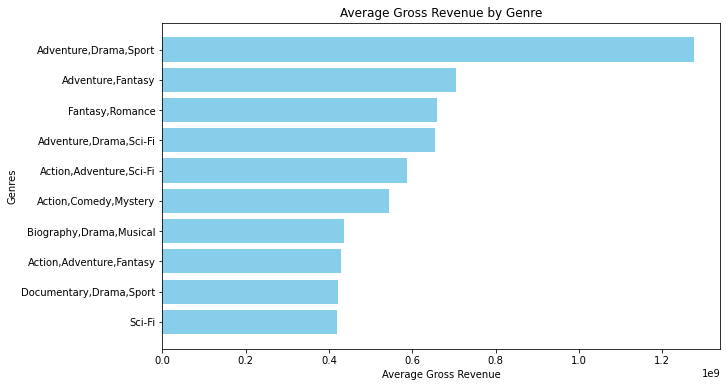

In [32]:
# Calculate average gross revenue by genre
genre_avg_gross = final_data.groupby('genres')['total_gross'].mean().sort_values(ascending=False)

# Select the top genres (you can choose the number of top genres you want to display)
top_genres = genre_avg_gross.head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_genres.index, top_genres.values, color='skyblue')
plt.xlabel('Average Gross Revenue')
plt.ylabel('Genres')
plt.title('Average Gross Revenue by Genre')
plt.gca().invert_yaxis()  # Reverse the order to display the highest grossing genre at the top
plt.show()


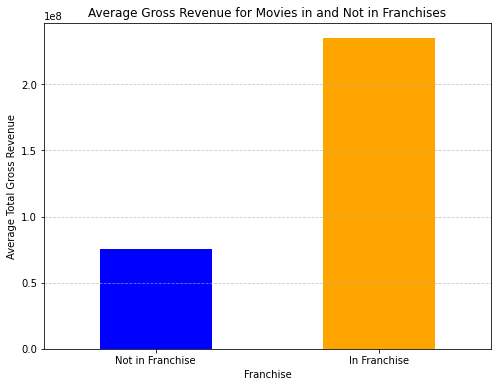

In [34]:
import matplotlib.pyplot as plt

# Group data by whether the movie is part of a franchise
franchise_avg_gross = final_data.groupby('is_franchise')['total_gross'].mean()

# Create a grouped bar chart
plt.figure(figsize=(8, 6))
franchise_avg_gross.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Franchise')
plt.ylabel('Average Total Gross Revenue')
plt.title('Average Gross Revenue for Movies in and Not in Franchises')
plt.xticks([0, 1], ['Not in Franchise', 'In Franchise'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


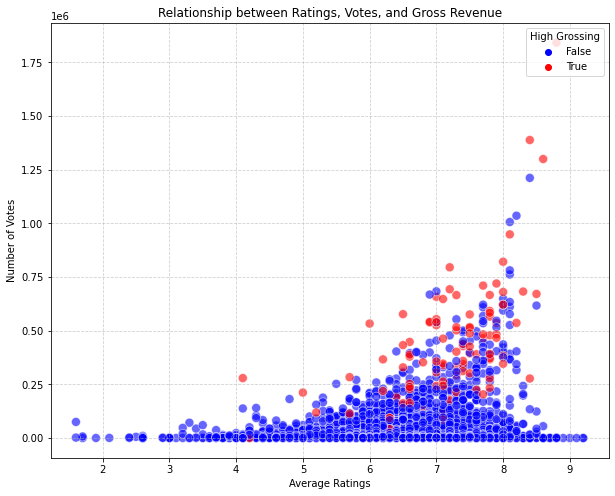

In [35]:
# Define a threshold for high-grossing movies
high_gross_threshold = 500_000_000

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=final_data, x='averagerating', y='numvotes', hue=final_data['total_gross'] >= high_gross_threshold, palette=['blue', 'red'], alpha=0.6, s=80)
plt.xlabel('Average Ratings')
plt.ylabel('Number of Votes')
plt.title('Relationship between Ratings, Votes, and Gross Revenue')
plt.grid(True, linestyle='--', alpha=0.6)

# Customize the legend
plt.legend(title='High Grossing', loc='upper right')
plt.show()


## Evaluation

The techniques effectively identified actionable patterns in the data. The focus on descriptive statistics and visualizations was appropriate given the goal of extracting insights rather than predicting outcomes.  


The analysis identified the **highest-grossing genres, the significance of franchises, and the impact of ratings and votes** on a movie's box office success.
The recommendations provide actionable insights for Microsoft, suggesting that focusing on Adventure, Animation, and Action genres, investing in franchises, and prioritizing quality ratings and engagement with the audience are key strategies.

The recommendations are founded on industry trends and data insights, making them relevant for Microsoft's decision-making process. By following these recommendations, Microsoft's new movie studio can increase its chances of producing successful and profitable films, potentially optimizing its return on investment.

Next steps could include forecast modeling to predict revenues and refine recommendations further as more data becomes available.

## Conclusions

Based on this analysis, the following recommendations are provided:

**i)  Focus on High Grossing Genres:** The data analysis suggests that genres like Adventure, Animation, and Action have consistently been the highest-grossing at the box office. Movies like 'Toy Story 3' and 'Inception' have been exceptionally successful in these genres, appealing to a broad audience. Therefore, Microsoft should consider prioritizing movie projects in these genres to maximize their chances of higher returns on investment.

**ii)  Invest in Franchises:** The analysis indicates that franchises like 'Star Wars,' 'Spider-Man,' and 'Jurassic Park' have consistently performed well in terms of box office revenue. This suggests that audiences have a strong affinity for sequels and stories with familiar characters and narratives. Microsoft should explore the development of movie franchises to establish a dependable stream of revenue while also keeping audiences engaged.

**iii)  Consider the Impact of Ratings and Votes:** Movies with higher average ratings and a substantial number of votes tend to perform better at the box office. For example, 'Inception' garnered high ratings and a significant number of votes, contributing to its commercial success. Therefore, Microsoft should prioritize producing high-quality films that engage and resonate with audiences, potentially leading to better financial outcomes.

The analysis has some limitations based on data completeness and recency. As the studio matures, Microsoft should revisit these findings against new movies and updated industry data. Annual refreshes would ensure recommendations remain relevant.

By targeting proven high-grossing genres, leveraging franchises, and promoting quality films, Microsoft can make data-driven decisions for its movie investments. This will lead to profitable projects that resonate with audiences.